<a href="https://colab.research.google.com/github/neilsubick/data_analytics/blob/main/Machine_Learning_Logistic_Regression_Guided_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [25]:
#Standard Libraries for visualization and data wrangling

import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns; sns.set()
%matplotlib inline
sns.set_style('whitegrid')

#Logistic Regression Models

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline

## Get the Data
**Read in the advertising.csv file and load it to a data frame called ad_data.**

In [26]:
df_raw = pd.read_csv("https://raw.githubusercontent.com/niteen11/cuny_lagcc_micro_credential_data_analytics/main/Track%20A/Unit%204%20-%20Machine%20Learning%20and%20Modeling%20Techniques/Dataset/advertising.csv")

In [27]:
 df_raw.columns = df_raw.columns.str.strip().str.lower().str.replace(' ','_').str.replace('/','_').str.replace('%','pct')

In [28]:
ad_data = df_raw

**Check the head of ad_data**

In [29]:
ad_data.head()
ad_data.tail()
ad_data.columns
ad_data.isnull().sum()

daily_time_spent_on_site    0
age                         0
area_income                 0
daily_internet_usage        0
ad_topic_line               0
city                        0
male                        0
country                     0
timestamp                   0
clicked_on_ad               0
dtype: int64

** Use info and describe() on ad_data**

In [30]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   daily_time_spent_on_site  1000 non-null   float64
 1   age                       1000 non-null   int64  
 2   area_income               1000 non-null   float64
 3   daily_internet_usage      1000 non-null   float64
 4   ad_topic_line             1000 non-null   object 
 5   city                      1000 non-null   object 
 6   male                      1000 non-null   int64  
 7   country                   1000 non-null   object 
 8   timestamp                 1000 non-null   object 
 9   clicked_on_ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [31]:
ad_data.describe()

,daily_time_spent_on_site,age,area_income,daily_internet_usage,male,clicked_on_ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

** Create a histogram of the Age**

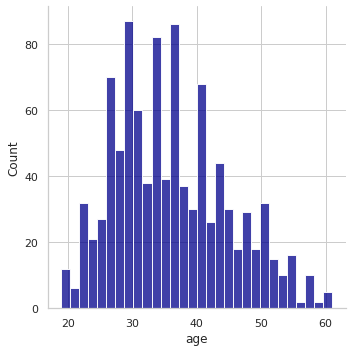

In [36]:
sns.set_style("whitegrid")
sns.displot(ad_data['age'].dropna(), kde=False, color='darkblue', bins=30)

**Create a jointplot showing Area Income versus Age.**

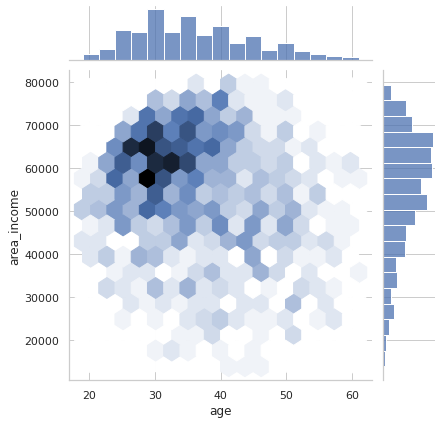

In [44]:
sns.set_style("whitegrid")
sns.jointplot(x='age', y='area_income',kind='hex', data=ad_data)

** Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

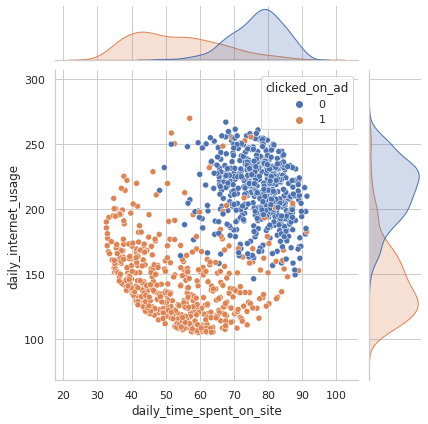

In [49]:
sns.set_style("whitegrid")
sns.jointplot(x='daily_time_spent_on_site', y='daily_internet_usage',hue='clicked_on_ad', data=ad_data, color='green')

# Logistic Regression

Now it's time to do a train test split, and train the model.

You'll have the freedom here to choose columns that you want to train on!

** Split the data into training set and testing set using train_test_split**

In [50]:
ds = ad_data

In [53]:
y = ds['clicked_on_ad']
X = ds[['daily_time_spent_on_site', 'age', 'area_income','daily_internet_usage', 'male']]

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [58]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

** Train and fit a logistic regression model on the training set.**

In [59]:
logmodel = LogisticRegression()

In [60]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Predictions and Evaluations
** Now predict values for the testing data.**

In [61]:
y_test_pred = logmodel.predict(X_test)

** Create a classification report for the model.**

In [62]:
print(classification_report(y_test, y_test_pred))
print('\n')
print(confusion_matrix(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       136
           1       0.99      0.96      0.98       114

    accuracy                           0.98       250
   macro avg       0.98      0.98      0.98       250
weighted avg       0.98      0.98      0.98       250



[[135   1]
 [  4 110]]


accuracy = 0.98

total = 136+114 = 250

Actual No = 135 + 1 = 136

Actual yes = 4 + 110 = 114

Predict No = 135 + 4 = 139

Predict Yes = 1 + 110 = 111

Accuracy = TP+TN/Total 110+135/250 = 98

rate of error = 1-accuracy = 2(0.02)

specificity = TN/Actual No = 135/136 = 99.26

sensitivity = TP/Acutail Yes = 110/114 = 0.96
